**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [77]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})

%load_ext autoreload
%autoreload 2 

from Problem_1 import WorkerClass
from Problem_1 import GovClass
from Problem_2 import SalonClass
from Problem_3 import GlobalOptimizerClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

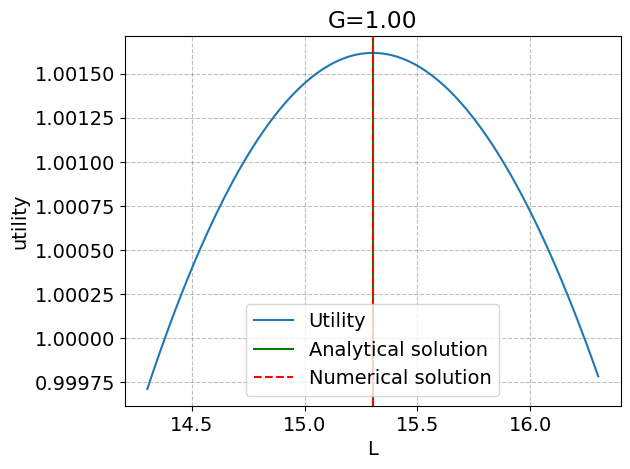

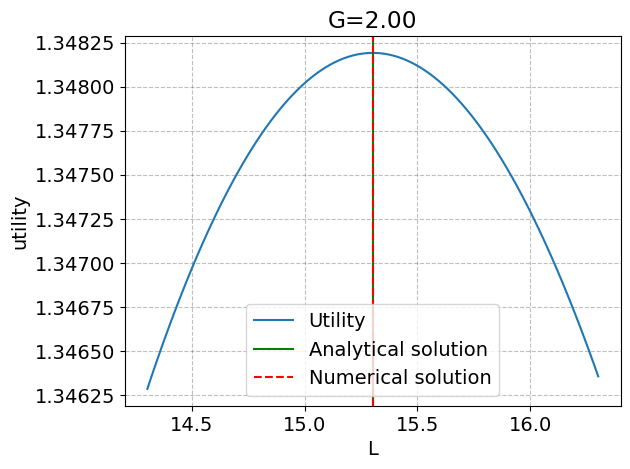

In [78]:
worker = WorkerClass()
worker.test_L_opt(G=1.0)
worker.test_L_opt(G=2.0)

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

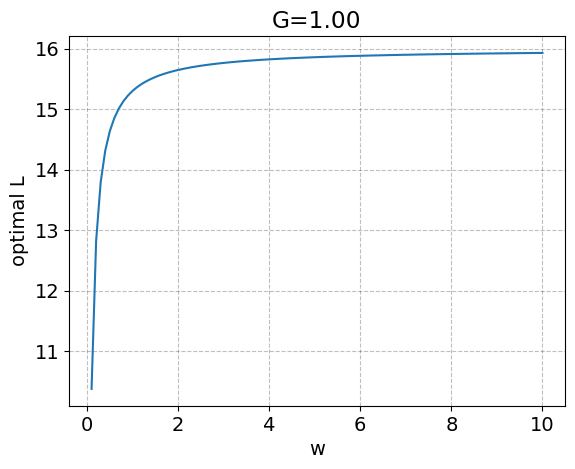

In [79]:
worker.plot_L_opt_w(G=1.0)


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


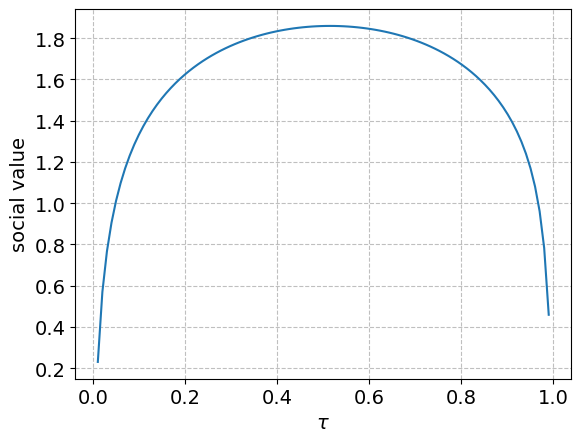

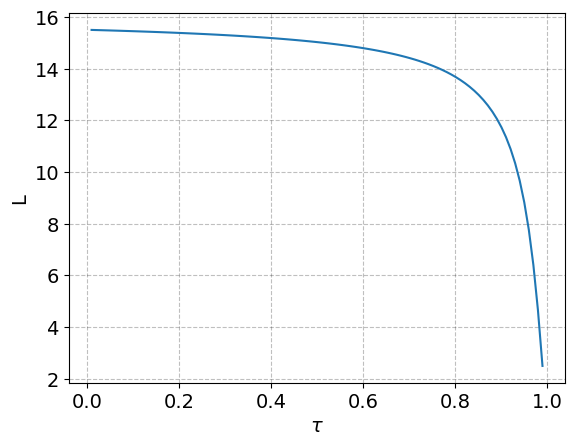

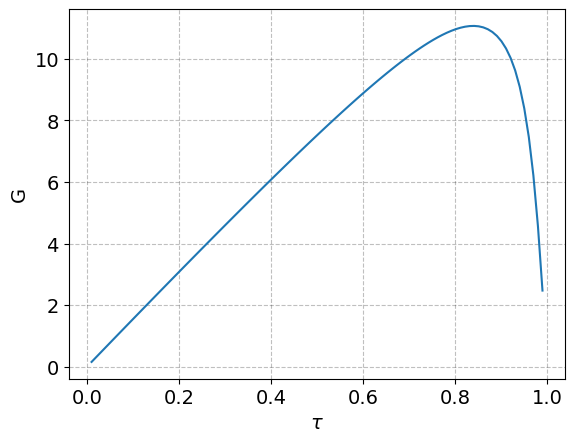

In [80]:
Gov = GovClass()
Gov.plot_social_value_tau()

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

tau_opt = 0.51
social value = 1.86
L_opt = 15.00
G_opt = 7.72


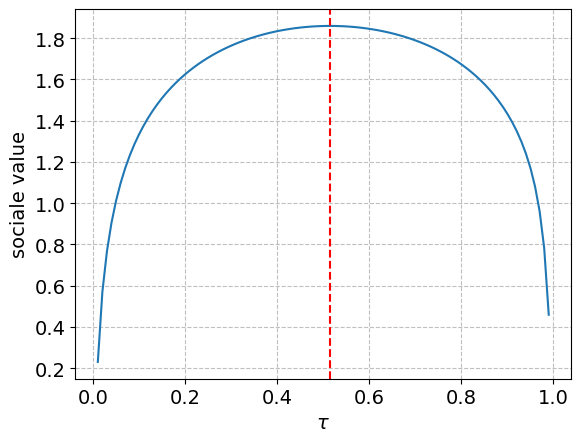

In [81]:
Gov.find_optimal_tau()

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

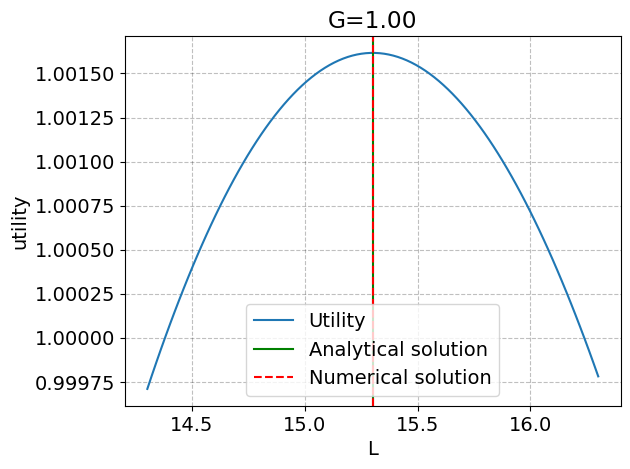

In [82]:
worker.test_L_opt(G=1,utility_func_name='utility_ces')

G that set budget surplus to zero is now 7.7112
Before it was                            7.7196


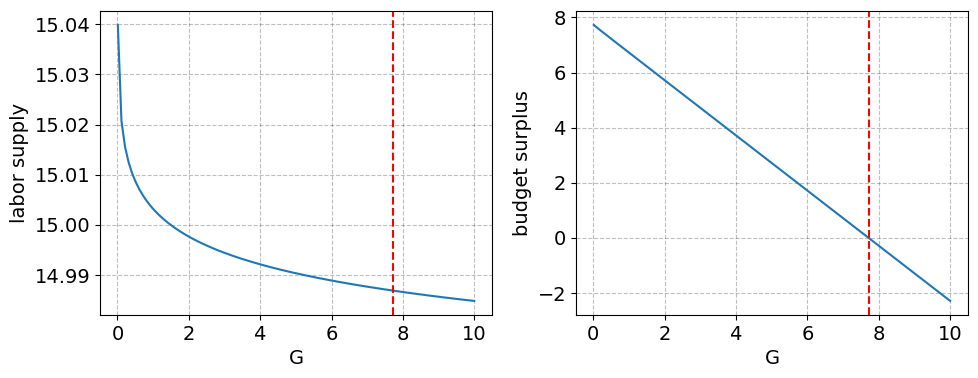

In [83]:
Gov.find_G(Gov.sol_cb.tau_opt,plotit=True)
print(f'G that set budget surplus to zero is now {Gov.sol_ces.G_opt:.4f}')
print(f'Before it was                            {Gov.sol_cb.G_opt:.4f}')

G that set budget surplus to zero is now 4.9752
Before it was                            7.7196


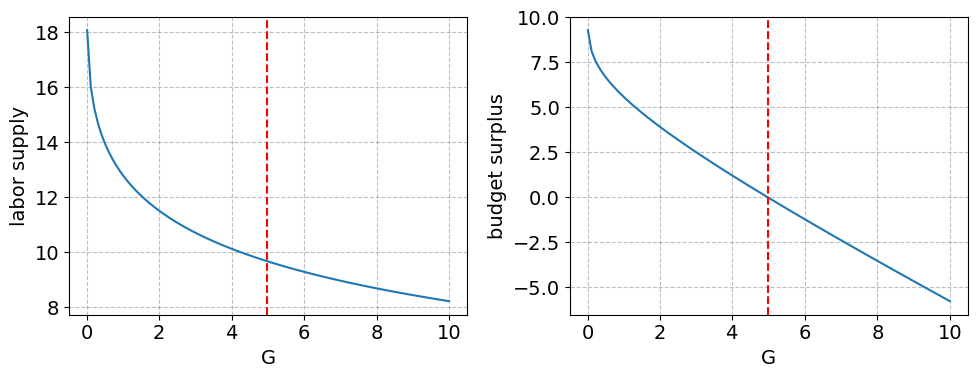

In [84]:
Gov_alt = Gov.copy()
Gov_alt.worker.par.sigma = 1.5
Gov_alt.worker.par.rho = 1.5

Gov_alt.find_G(Gov_alt.sol_cb.tau_opt,plotit=True)
print(f'G that set budget surplus to zero is now {Gov_alt.sol_ces.G_opt:.4f}')
print(f'Before it was                            {Gov_alt.sol_cb.G_opt:.4f}')

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

tau_opt = 0.51
social value = 1.86
L_opt = 15.00
G_opt = 7.72


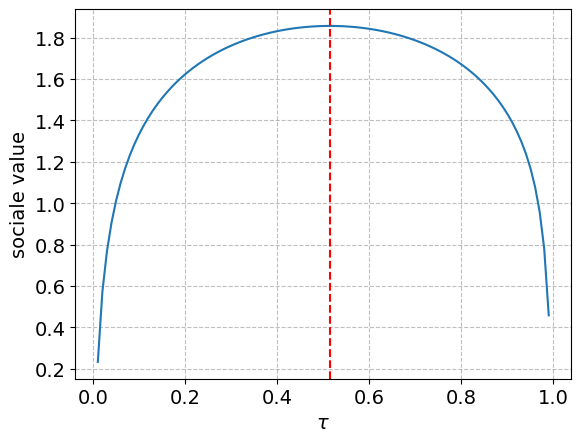

In [85]:
Gov.find_optimal_tau(type='ces')

tau_opt = 0.46
social value = 0.08
L_opt = 2.50
G_opt = 1.15


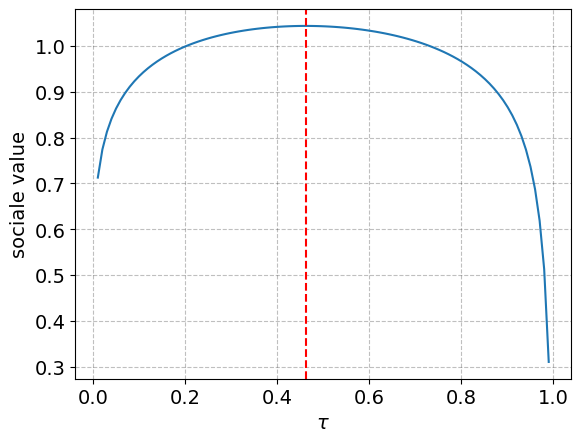

In [86]:
Gov_alt.find_optimal_tau(type='ces')

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

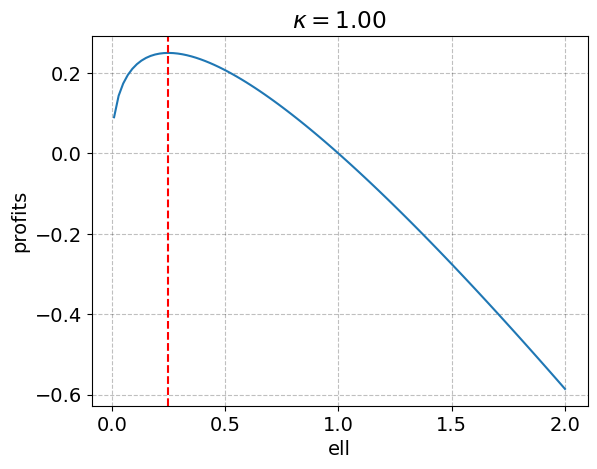

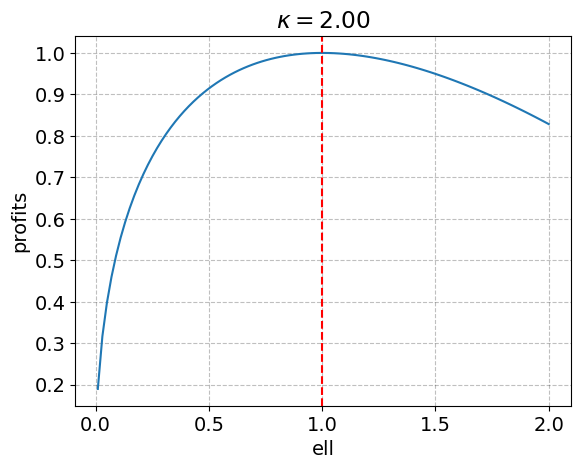

In [87]:
salon = SalonClass()
salon.plot_profits_static(kappa=1.0)
salon.plot_profits_static(kappa=2.0)

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R^{-1} \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K-1} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [88]:
np.random.seed(1997)
state = np.random.get_state()

In [89]:
salon.simulate(state=state)
salon.evaluate()

H = 27.67 for static_policy


In [90]:
# Check importance of the size of K
J = 100
for K in [10,100,500,1000,5000,10000]:
    salon.par.K=K
    
    Hs = np.zeros(J)
    
    for j in range(J):
        salon.simulate()
        salon.evaluate(print_result=False)
        Hs[j] = salon.sim.H
    
    print('K =',K)
    print('Std H:',np.std(Hs))
    print(f'Min-max H: {np.min(Hs):.3f}-{np.max(Hs):.3f}')

    print('-----------')


K = 10
Std H: 1.5366660535673489
Min-max H: 24.138-31.789
-----------
K = 100
Std H: 0.5061474302599552
Min-max H: 26.611-29.183
-----------
K = 500
Std H: 0.2605017498426443
Min-max H: 27.071-28.347
-----------
K = 1000
Std H: 0.1678848984995982
Min-max H: 27.282-28.105
-----------
K = 5000
Std H: 0.06935118839808889
Min-max H: 27.547-27.860
-----------
K = 10000
Std H: 0.05284961254594148
Min-max H: 27.540-27.812
-----------


H = 27.67 for static_policy


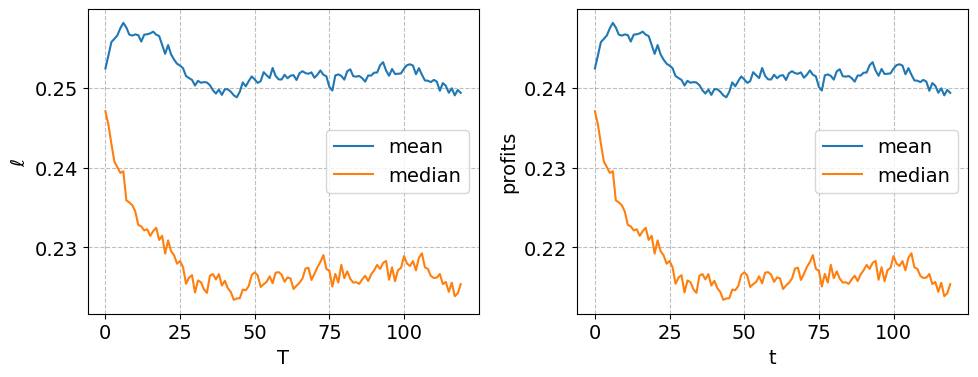

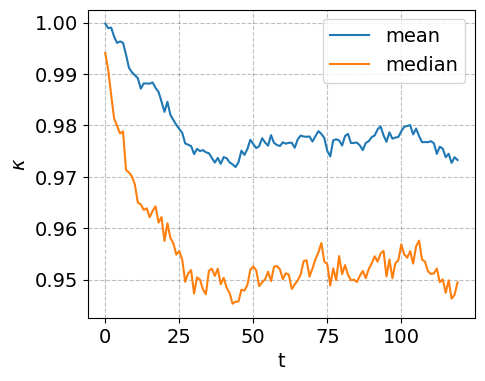

In [91]:
salon.simulate(state=state) # back to initial state
salon.evaluate()
salon.plot_policy_agg()

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [92]:
salon.evaluate('delta_policy')

H = 28.35 for delta_policy
Delta = 0.0500


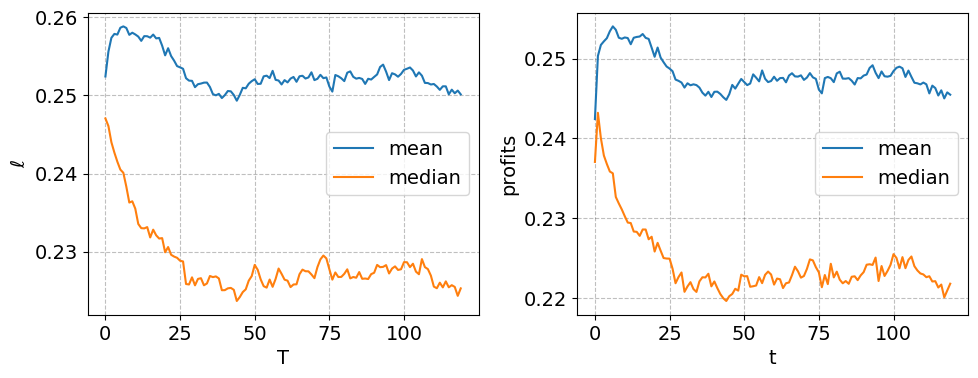

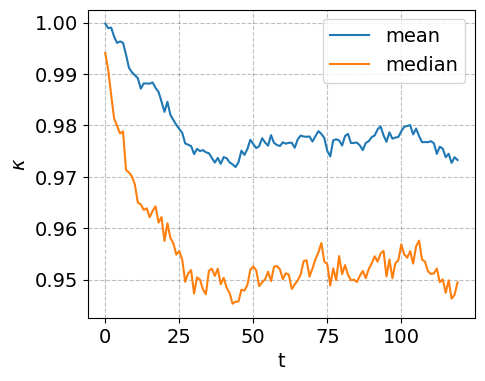

In [93]:
salon.plot_policy_agg()

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [94]:
salon.find_optimal_pars()

Optimized Delta = 0.0752
Optimal H       = 28.4102


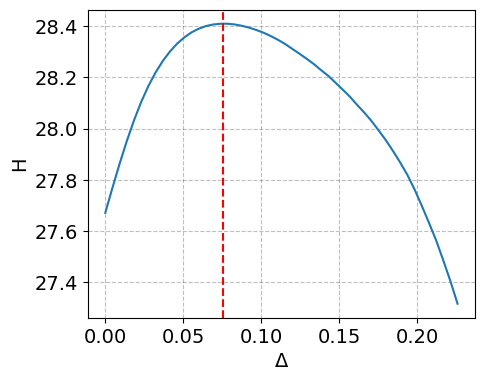

In [95]:
salon.plot_H_across_delta()

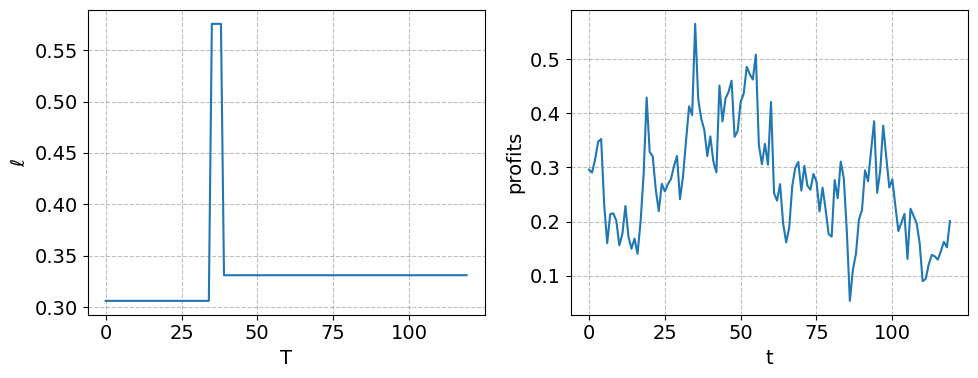

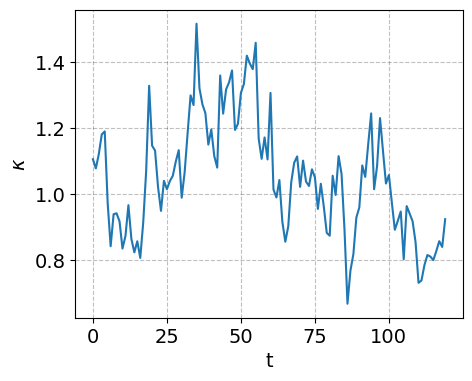

In [96]:
salon.plot_policy(k=100) # example

In [97]:
salon.ensure_optimal_pars(state=state)

E(Delta)   = 0.0763
Std(Delta) = 0.0009
E(H)       = 28.4171



**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [98]:
salon.simulate(state=state) # Go back to initial state for comparison

In [99]:
salon.find_optimal_pars(policy ='alt_delta_policy',
                        opt_pars=['Delta','adjust'],
                        bounds=((0,None),(0.9,1.1)))

Optimized Delta = 0.0744
Optimized adjust = 0.9853
Optimal H       = 28.4118


In [100]:
salon.find_optimal_pars(policy='alt2_delta_policy',
                        opt_pars=['Delta','adjust','Delta_adjust'],
                        bounds=((0,None),(0.9,1.1),(-0.5,1.5)))

Optimized Delta = 0.0734
Optimized adjust = 0.9843
Optimized Delta_adjust = -0.0477
Optimal H       = 28.4109


## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [101]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [102]:
np.random.seed(7)
state = np.random.get_state()

k =    0, f_ast =  93.19572593, x_ast = [-508.67241791  337.30587978]
k =    1, f_ast =  19.16798717, x_ast = [-75.35984698 266.30487216]
k =    4, f_ast =  19.09798985, x_ast = [-2.76321549e+02  2.81536537e-07]
k =   12, f_ast =  14.52224047, x_ast = [ 103.62009799 -217.48261156]
k =   13, f_ast =   1.48689946, x_ast = [65.94045635 39.94597342]
k =   16, f_ast =   0.42171226, x_ast = [-40.82029283   4.43844356]
k =  124, f_ast =   0.10850154, x_ast = [-18.84013553  -8.87688854]
k =  208, f_ast =   0.08878205, x_ast = [-1.88401357e+01  8.59161296e-09]
k =  229, f_ast =   0.06658407, x_ast = [-15.7001131    4.43844434]
k =  233, f_ast =   0.05917818, x_ast = [-12.56009041  -8.87688877]
k =  254, f_ast =   0.05917818, x_ast = [-12.56009041  -8.87688875]
k =  263, f_ast =   0.01971949, x_ast = [-8.33323589e-09  8.87688894e+00]
k =  324, f_ast =   0.00986467, x_ast = [6.28004528e+00 1.07411806e-09]
k =  329, f_ast =   0.00739604, x_ast = [3.14002262 4.43844447]
k =  337, f_ast =   0.000000

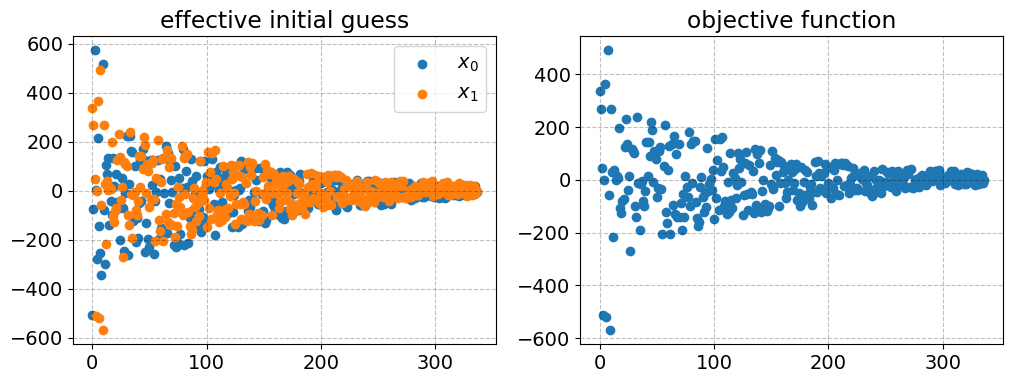

In [103]:
global_optimizer = GlobalOptimizerClass(griewank,K=1000,K_ubar=10,bounds=np.array([[-600,600],[-600,600]]))
global_optimizer.run()
global_optimizer.plot()

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [104]:
for K_ubar in [10,100]:
    np.random.set_state(state)
    print(f'### {K_ubar = } ###')
    global_optimizer.K_ubar = K_ubar
    global_optimizer.test()
    print('')

### K_ubar = 10 ###
Elapsed time:  0.88 seconds. Iterations:  337. f_ast = 0.00e+00
Elapsed time:  0.90 seconds. Iterations:  360. f_ast = 1.11e-16
Elapsed time:  0.83 seconds. Iterations:  336. f_ast = 1.11e-16
Elapsed time:  0.67 seconds. Iterations:  191. f_ast = 0.00e+00
Elapsed time:  0.70 seconds. Iterations:  270. f_ast = 0.00e+00
Elapsed time:  0.67 seconds. Iterations:  222. f_ast = 1.11e-16
Elapsed time:  0.65 seconds. Iterations:  248. f_ast = 1.11e-16
Elapsed time:  0.87 seconds. Iterations:  279. f_ast = 1.11e-16
Elapsed time:  0.86 seconds. Iterations:  327. f_ast = 0.00e+00
Elapsed time:  0.98 seconds. Iterations:  356. f_ast = 0.00e+00
Average time:        0.80 seconds
Average iterations: 292.60

### K_ubar = 100 ###
Elapsed time:  0.74 seconds. Iterations:  229. f_ast = 0.00e+00
Elapsed time:  1.18 seconds. Iterations:  468. f_ast = 0.00e+00
Elapsed time:  1.42 seconds. Iterations:  506. f_ast = 0.00e+00
Elapsed time:  0.61 seconds. Iterations:  199. f_ast = 1.11e-16
E